## Importing the Libraries

In [1]:
import numpy as np
import sys
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Question 1(a)
1. Perform PCA on SVHN data set.
2. Find how many top eigenvectors are required to keep the proportion of variance above 0.9.
3. Plot PoV against number of eigenvectors.

In [2]:
# Load the dataset
svhn_data = loadmat('./data/train_32x32.mat')
X = svhn_data['X']
y = svhn_data['y']
print("Shape of Independed Variable X ",X.shape)
print("Shape of Label Y ",y.shape)

Shape of Independed Variable X  (32, 32, 3, 73257)
Shape of Label Y  (73257, 1)


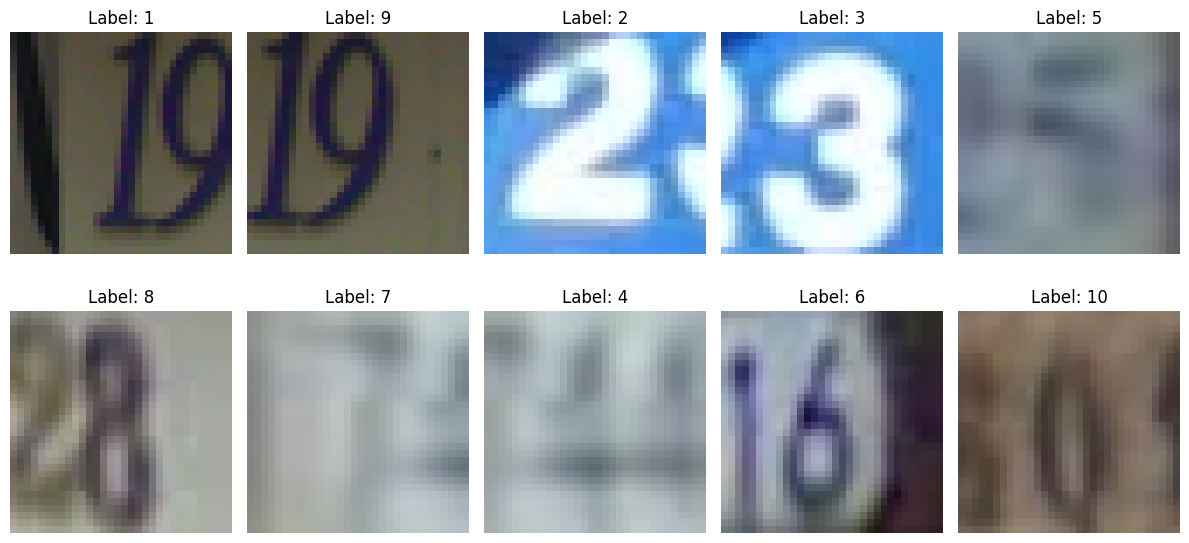

In [3]:
# Plotting image from each of 10 classes

X = svhn_data['X']
y = svhn_data['y']
total_images=10;i=0;j=0
already_covered = []
# Plot a few sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
while i<X.shape[3]:
    if y[i,0] in already_covered:
        i+=1
        continue
    ax = axes.flatten()[j]
    img = X[:, :, :, i]
    label = y[i, 0] 
    already_covered.append(label)
    ax.imshow(img)
    ax.set_title(f'Label: {label}')
    ax.axis('off')
    if j>10:
        break
    j+=1

plt.tight_layout()
plt.show()

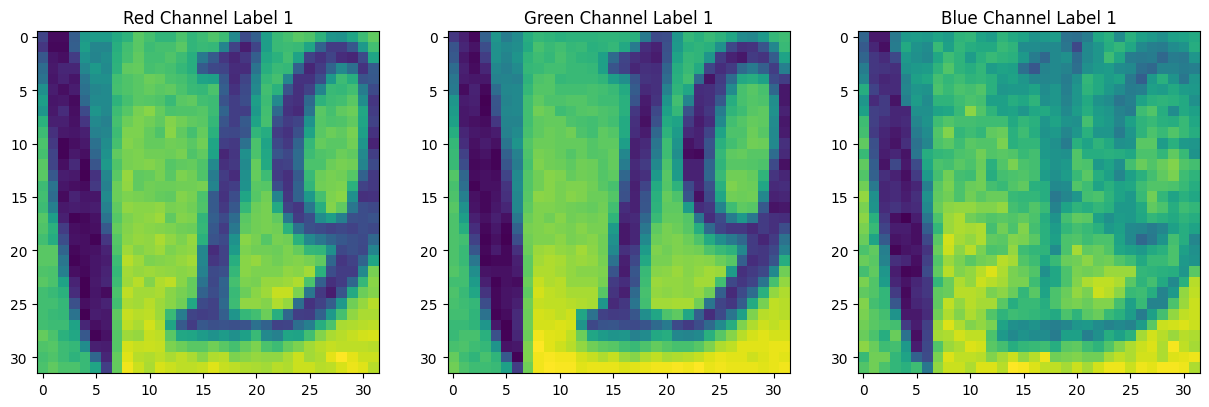

In [4]:
# Plotting images from each of the three channels Red,Green,Blue Channel for a particular image
X = svhn_data['X']
y = svhn_data['y']
X_r = X[:,:,0,:]
X_g = X[:,:,1,:]
X_b = X[:,:,2,:]

i=0
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title(f"Red Channel Label {y[i,0]}")
plt.imshow(X_r[:,:,0])
fig.add_subplot(132)
plt.title(f"Green Channel Label {y[i,0]}")
plt.imshow(X_g[:,:,0])
fig.add_subplot(133)
plt.title(f"Blue Channel Label {y[i,0]}")
plt.imshow(X_b[:,:,0])
plt.show()


In [5]:
# flattening channel wise
X_r = np.reshape(X_r, (np.prod(X_r.shape[:-1]), X_r.shape[-1])).T
X_g = np.reshape(X_g, (np.prod(X_g.shape[:-1]), X_g.shape[-1])).T
X_b = np.reshape(X_b, (np.prod(X_b.shape[:-1]), X_b.shape[-1])).T

X_combined = np.reshape(X, (np.prod(X.shape[:-1]), X.shape[-1])).T
print(X_r.shape)
print(X_g.shape)
print(X_b.shape)
print(X_combined.shape)

(73257, 1024)
(73257, 1024)
(73257, 1024)
(73257, 3072)


In [6]:
#function for standardizing image
def Standardize(X):
    #calcualte the mean of each column mu   
    mu = np.mean(X, axis = 0) 
    
    #Substract the mean from X
    X = X - mu  
    
    #calcualte the standard deviation of each column std
    std = np.std(X, axis = 0)  
    
    #handleing zero standard deviation
    std_filled = std.copy()
    std_filled[std == 0] = 1.0
    
    #calculate standardized X called Xbar
    Xbar = (X-mu) / std_filled  
    
    return Xbar, mu, std


X_r,mu_r,std_r = Standardize(X_r)
X_g,mu_g,std_g = Standardize(X_g)
X_b,mu_g,std_b = Standardize(X_b)
X_combined,mu_combined,std_combined = Standardize(X_combined)

In [7]:
def plot_cummulative_variance(X,title):
    """
    Function to plot the cummulative variance graph and 
    find the Point of Variance exceeding 0.9
    """
    
    # Specify the number of components you want to retain
    n_components = X.shape[1]  # Adjust as needed
    
    # Create a PCA instance
    pca = PCA(n_components=n_components)
    
    # Fit the model and transform the data
    X_pca = pca.fit_transform(X)
    # Calculate the cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    # Find the number of components required to keep the PoV above 0.9
    n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1
    
    # Plot PoV against the number of eigenvectors
    plt.plot(cumulative_variance_ratio, marker='o')
    plt.xlabel('Number of Eigenvectors')
    plt.ylabel('Proportion of Variance (PoV)')
    plt.title(title)
    plt.axvline(x=n_components_90, color='r', linestyle='--', label=f'PoV >= 0.9 (n={n_components_90})')
    plt.legend()
    plt.show()




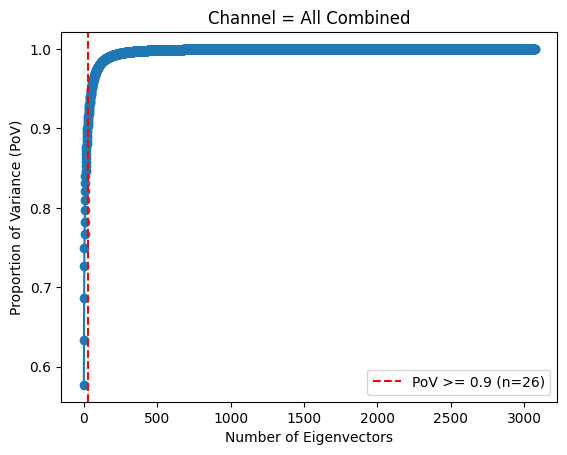

In [8]:
# Plotting variance explained graph and finding POV taking all channels into account
plot_cummulative_variance(X_combined,title="Channel = All Combined")

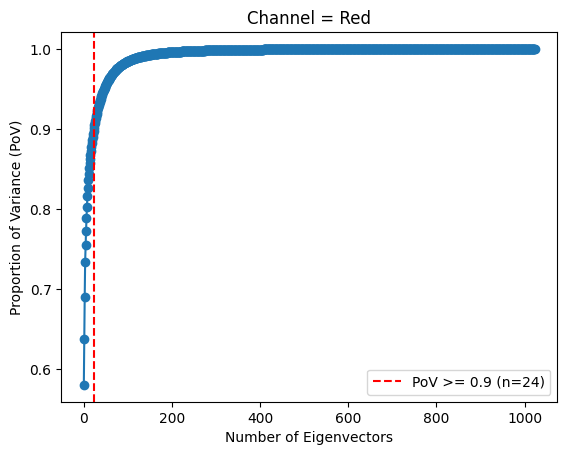

In [9]:
# Plotting variance explained graph and finding POV for a Red Channel
plot_cummulative_variance(X_r,title="Channel = Red")

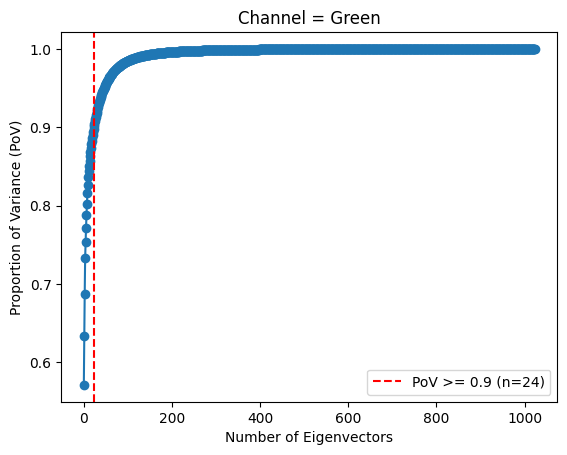

In [10]:
# Plotting variance explained graph and finding POV for Green Channel
plot_cummulative_variance(X_g,title="Channel = Green")

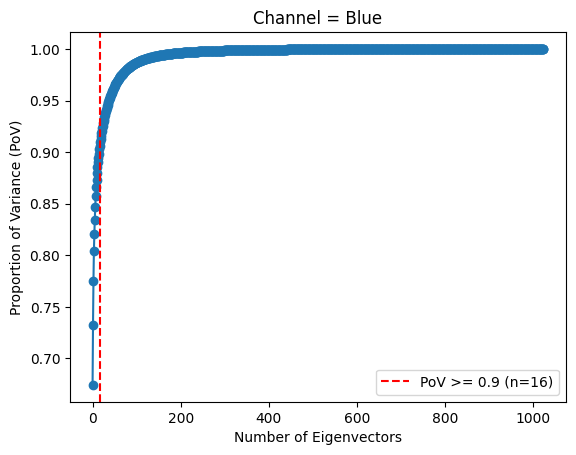

In [11]:
# Plotting variance explained graph and finding POV for Blue Channel
plot_cummulative_variance(X_b,title="Channel = Blue")

# Observations 1(a)
```
1. The point of variance exceeding 0.9 taking all channels into account  = 26
2. The point of variance exceeding 0.9 for Red Channel data  = 24
3. The point of variance exceeding 0.9 for Green Channel data  = 24
4. The point of variance exceeding 0.9 for Blue Channel data  = 16

```

# Question 1(b) 

Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one from each class) using top 10 eigenvectors

## Visualizing Image formed by using Top 10 Eigen Vectors for each of 10 classes

We observe that images formed by Top 10 eigen vectors are somewhat blurred but gives a indicative features of their original image

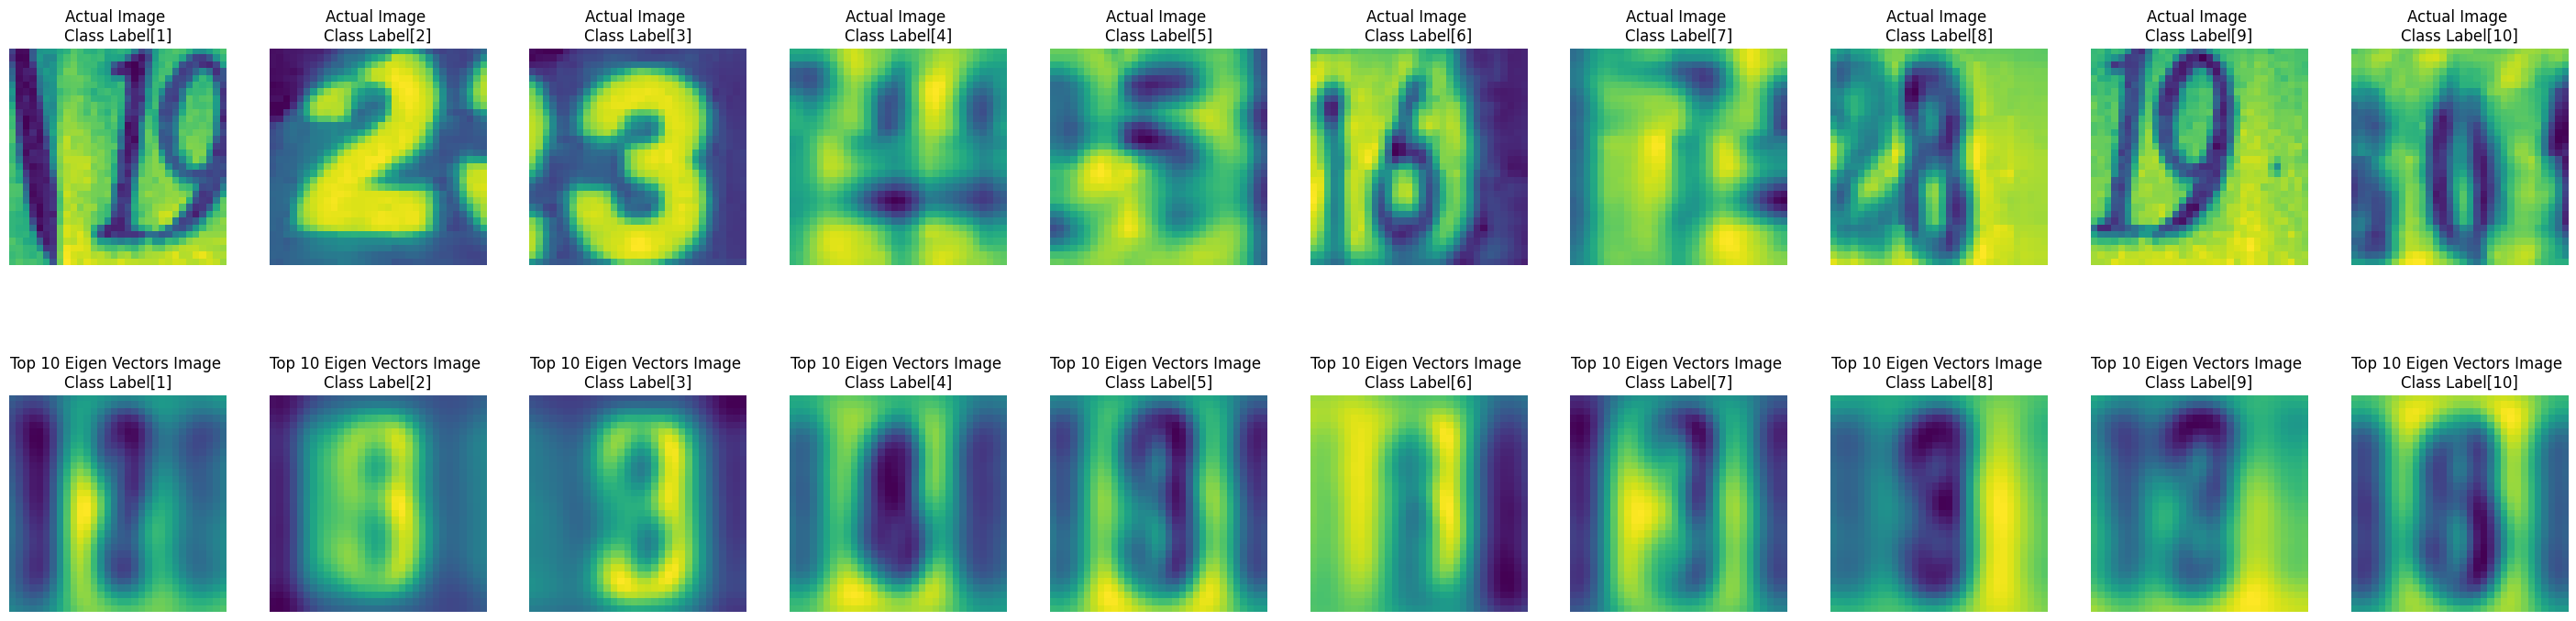

In [12]:
def plot_reconstructed_image(X, y):
    """
    Plot original and reconstructed images using top 10 eigenvectors.

    Parameters:
    - X: Input images.
    - y: Labels for images
    """
    # Visualize top 10 eigenvectors
    n_components = 10
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    eigenvectors = pca.components_.reshape(-1, 32, 32)
    
    # Reconstruct 10 SVHN samples (one from each class) using top 10 eigenvectors
    reconstructed_samples = []
    sample_indices = []

    for class_label in range(1, 11):
        # Find the indices of all occurrences of the class in the dataset
        class_indices = np.where(y == class_label)[0]

        # Take the first index from the class indices
        sample_indices.append(class_indices[0])

        # Project the sample onto the top 10 eigenvectors
        sample_pca = np.dot(X[class_indices[0]], pca.components_.T)

        # Reconstruct the sample using only top 10 eigenvectors
        reconstructed_sample = np.dot(sample_pca, pca.components_)
        reconstructed_samples.append(reconstructed_sample)

    # Display original and reconstructed samples
    plt.figure(figsize=(36, 9))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(X[sample_indices[i]].reshape(32, 32))
        plt.title(f'Actual Image \nClass Label{y[sample_indices[i]]}')

        plt.axis('off')

        plt.subplot(2, 10, i + 11)
        plt.title(f'Top 10 Eigen Vectors Image \nClass Label{y[sample_indices[i]]}')
        plt.imshow(reconstructed_samples[i].reshape(32, 32))
        plt.axis('off')

    plt.show()


plot_reconstructed_image(X_r, y)

## Visualizing Images formed by top 10 eigen vectors in Cummulative order

We try to visualize the images formed by top 1,top 2 and similarly top 10 eigen vectors and `like to show that image quality improves with the increase in number of top eigen vectors gets included as variance explained by them increases`

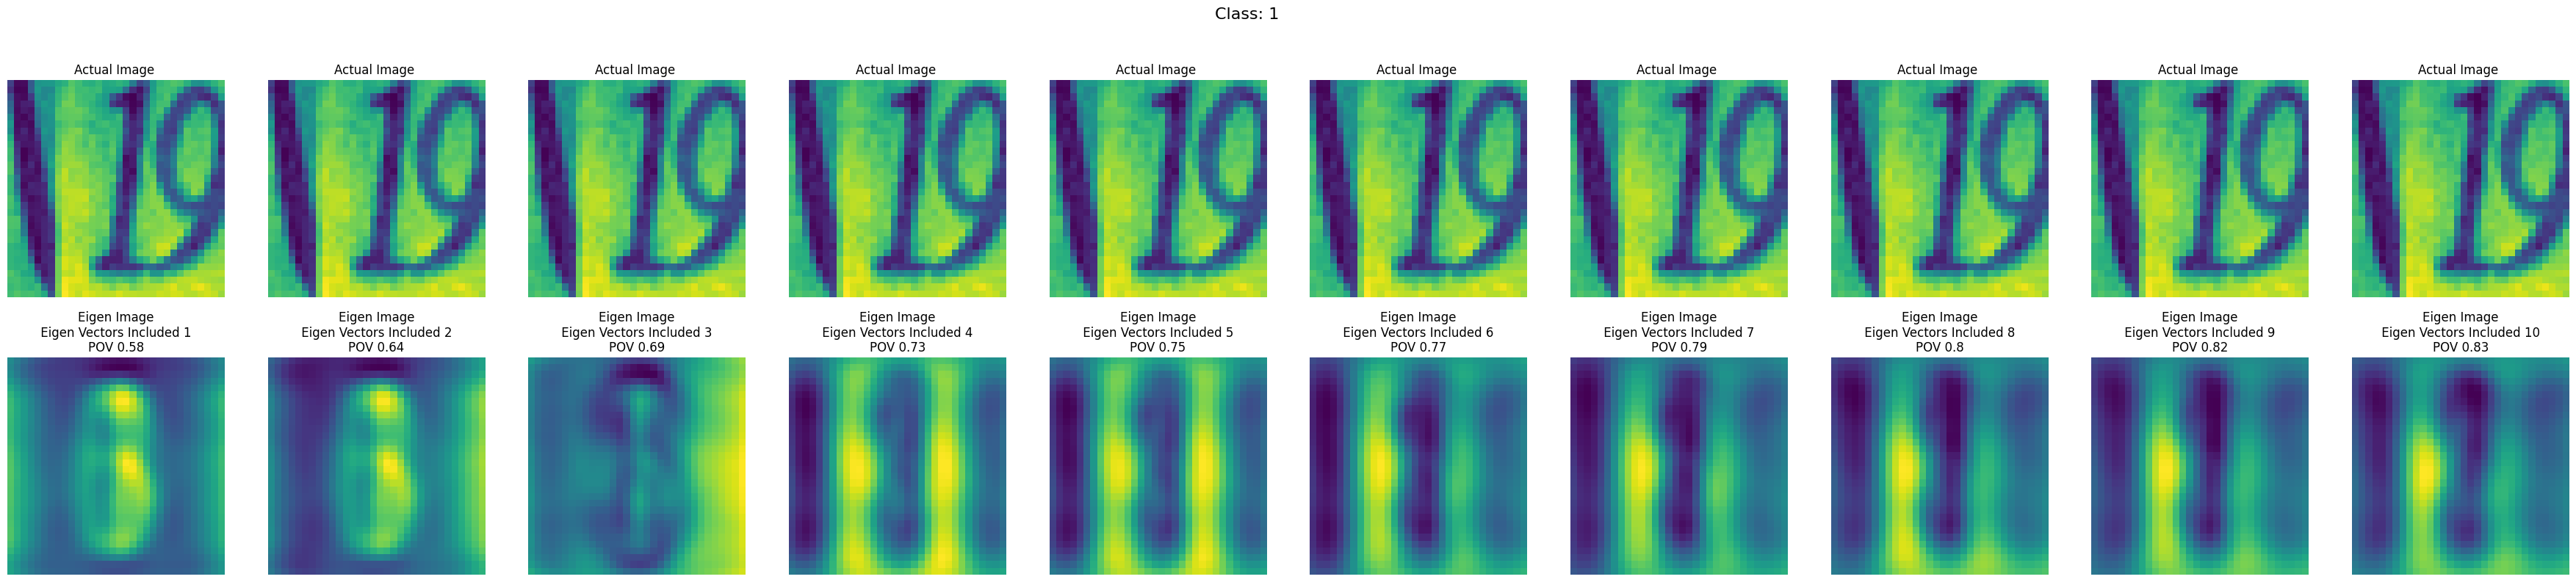

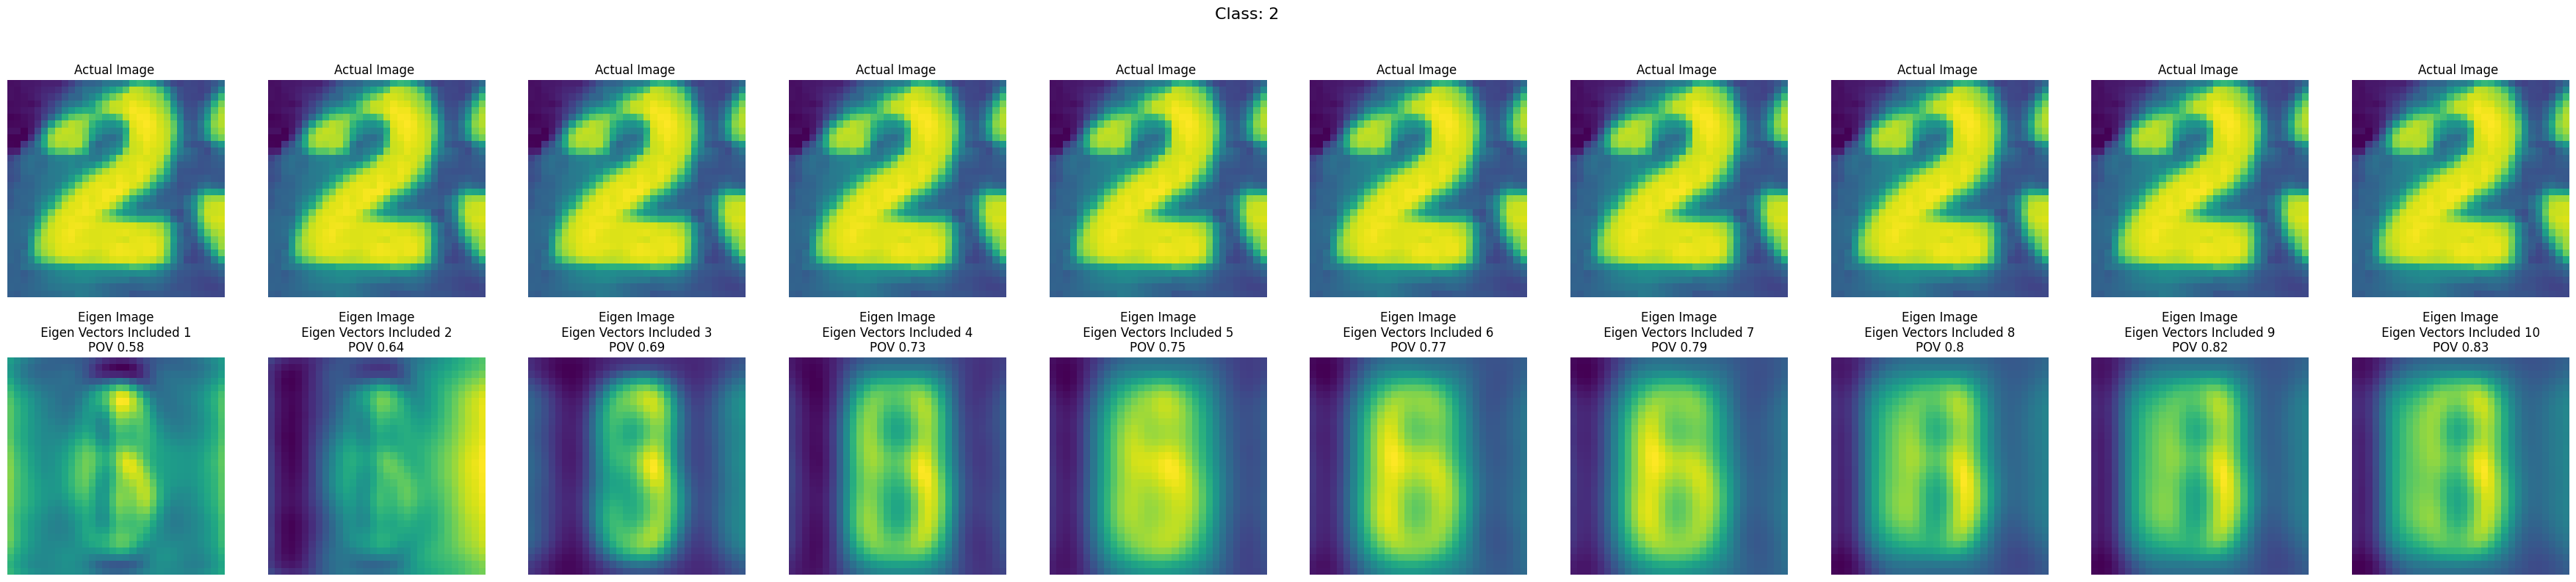

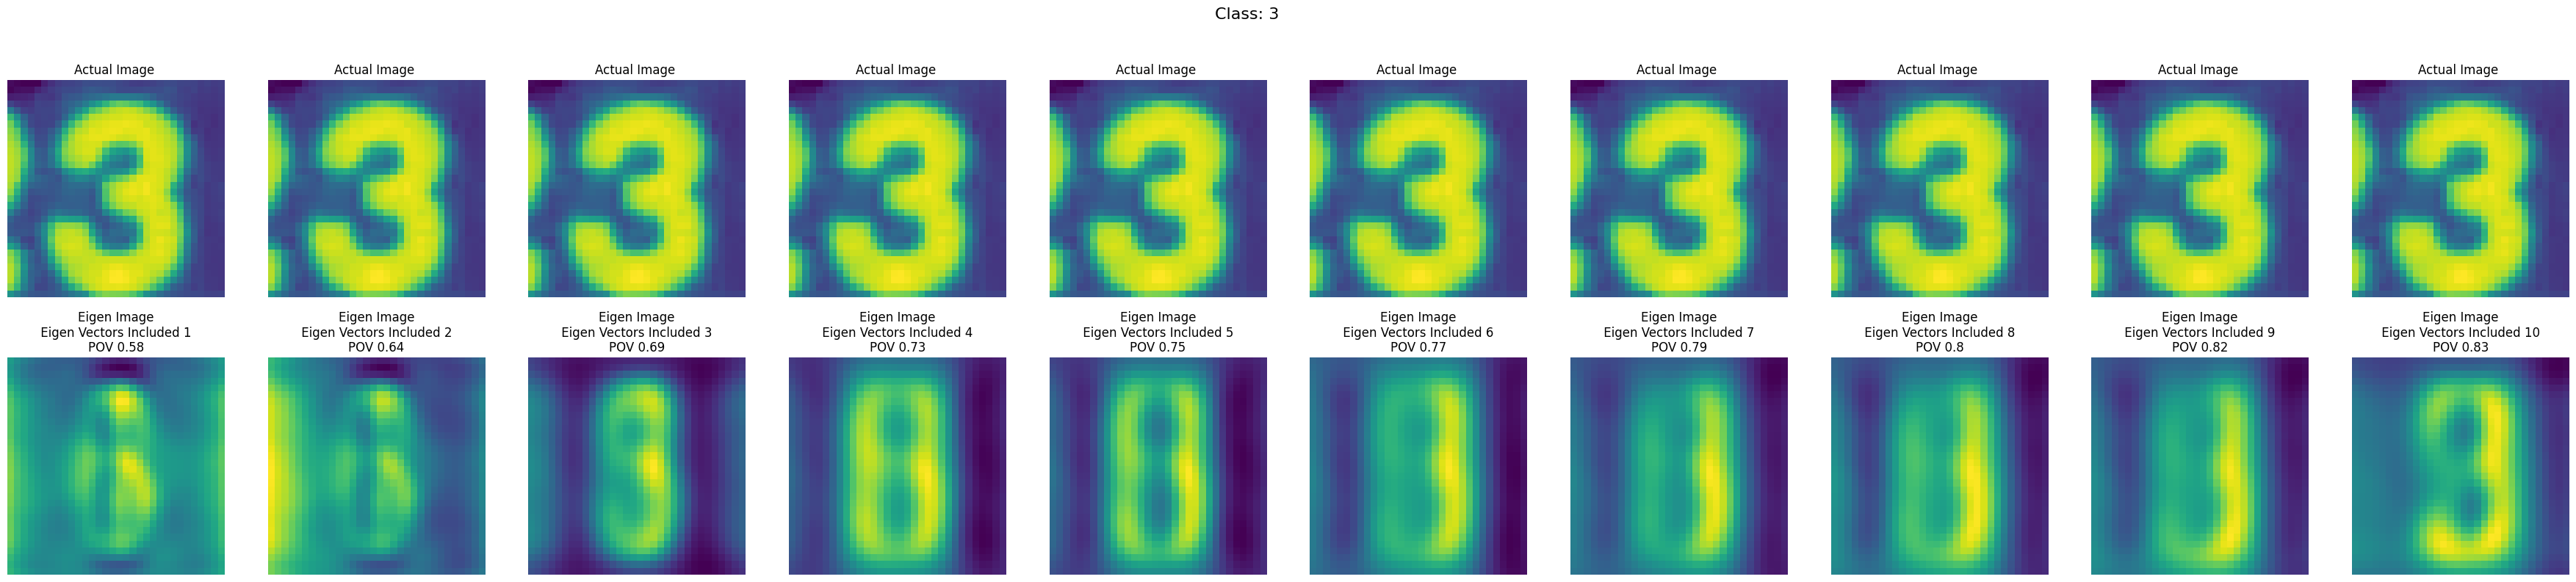

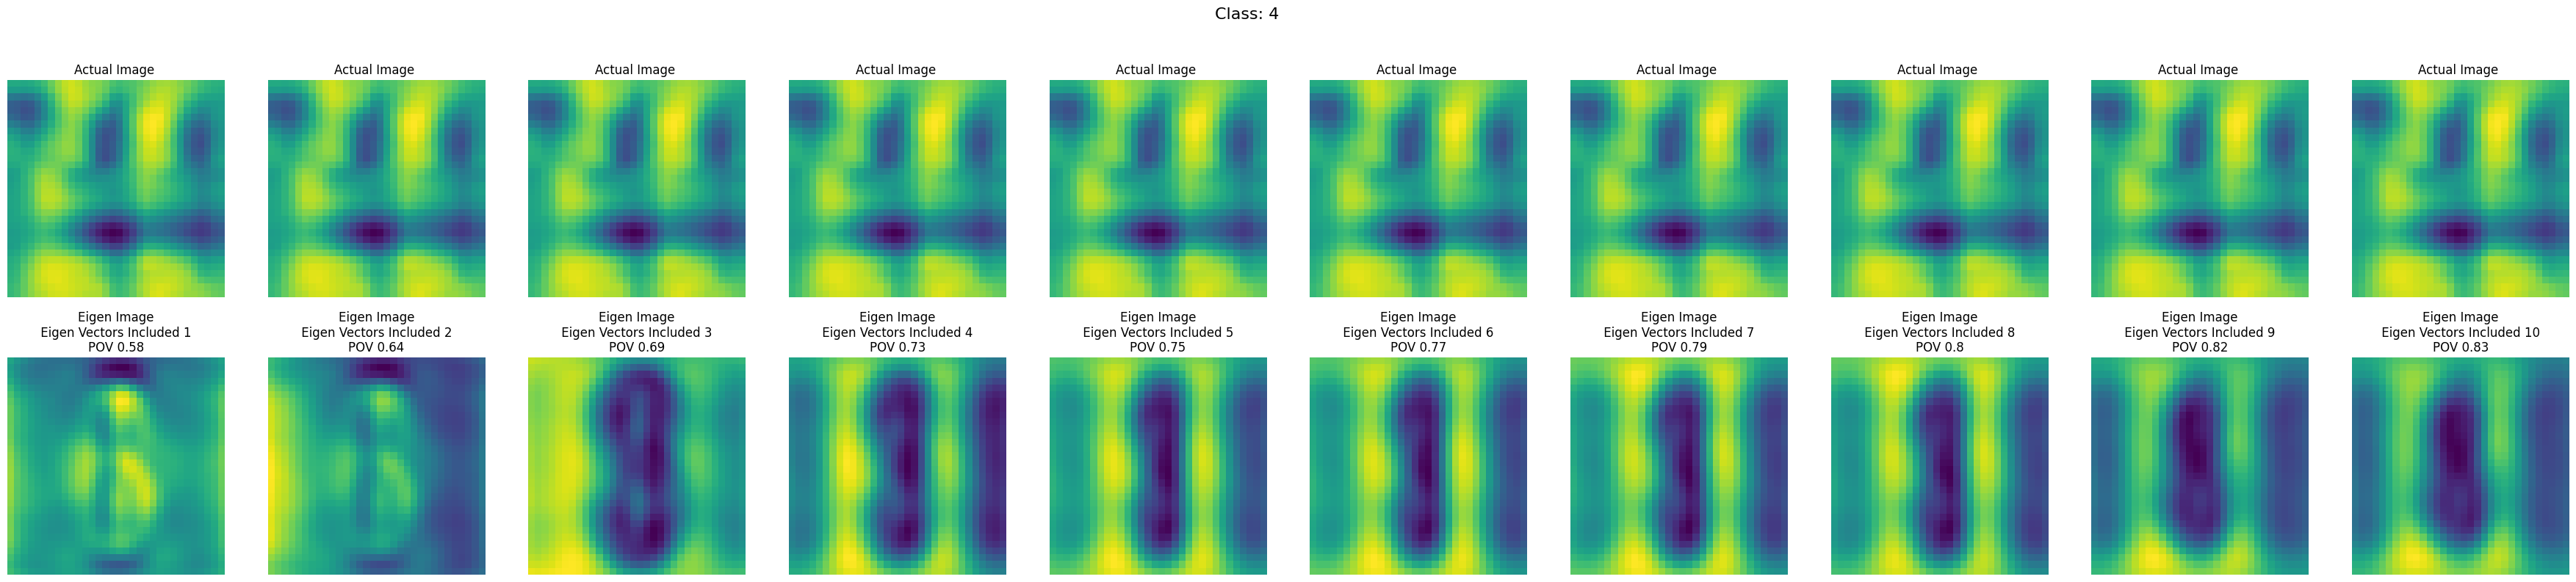

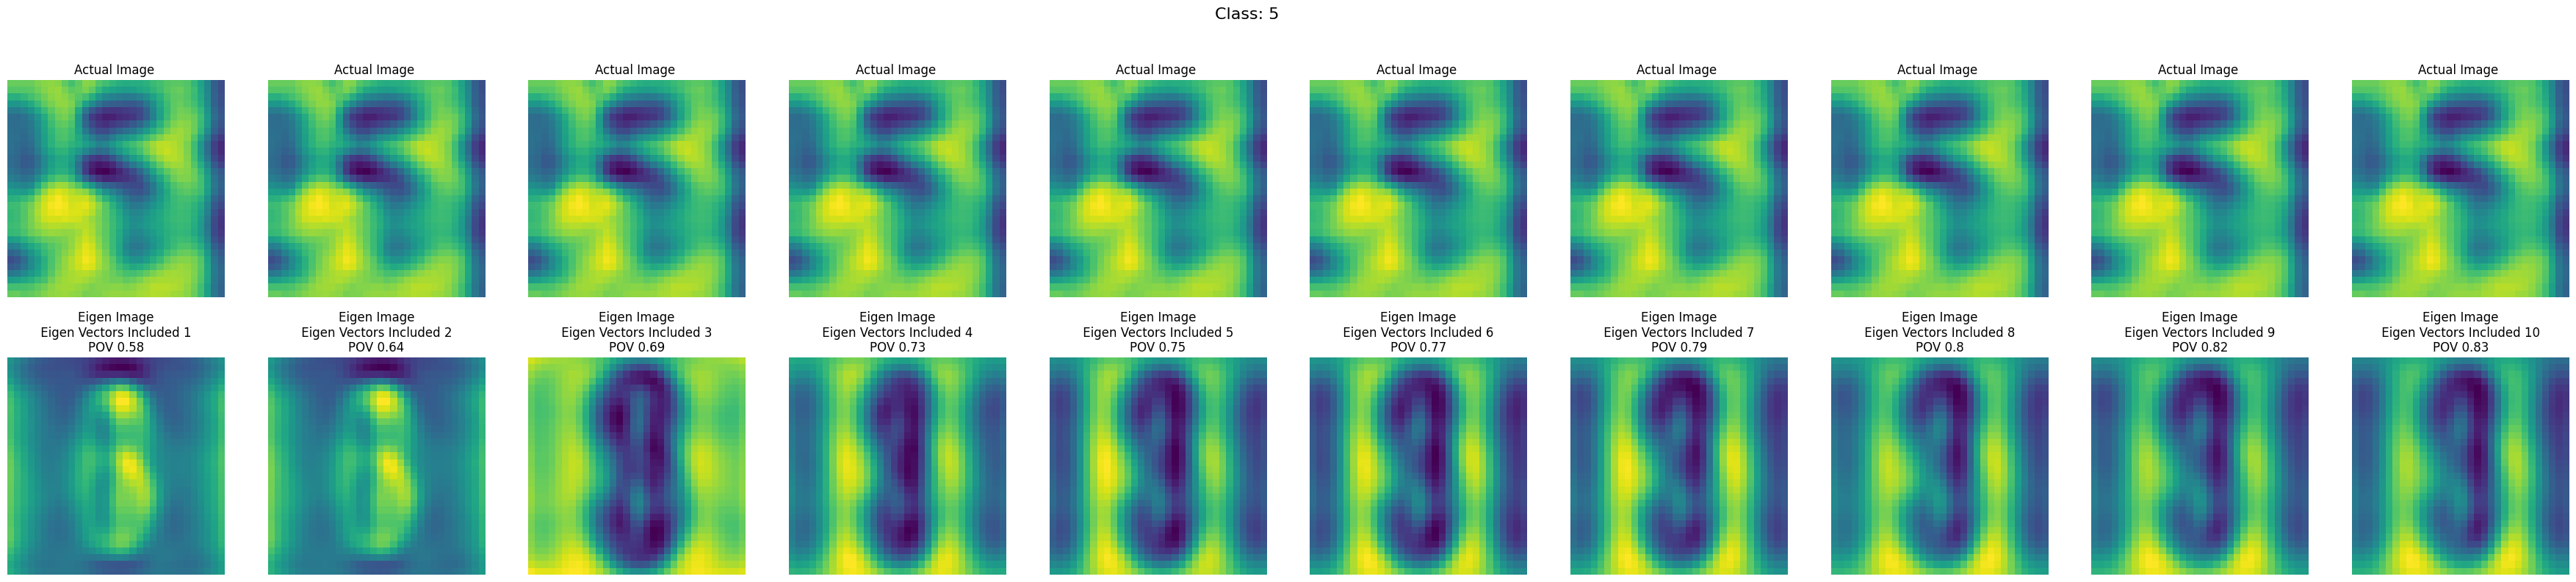

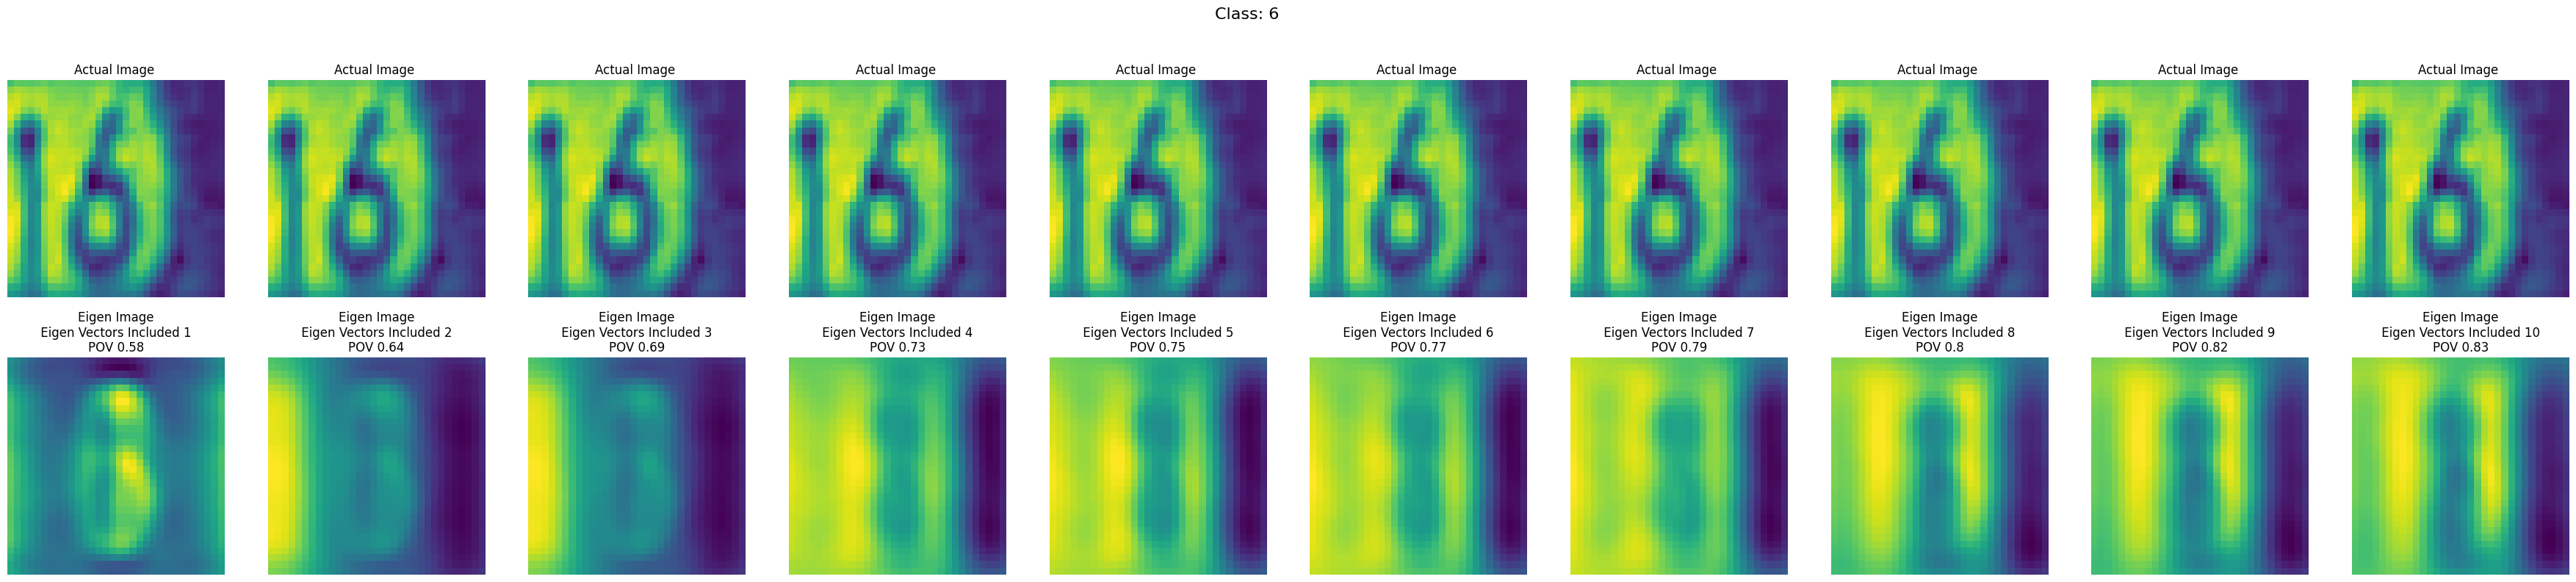

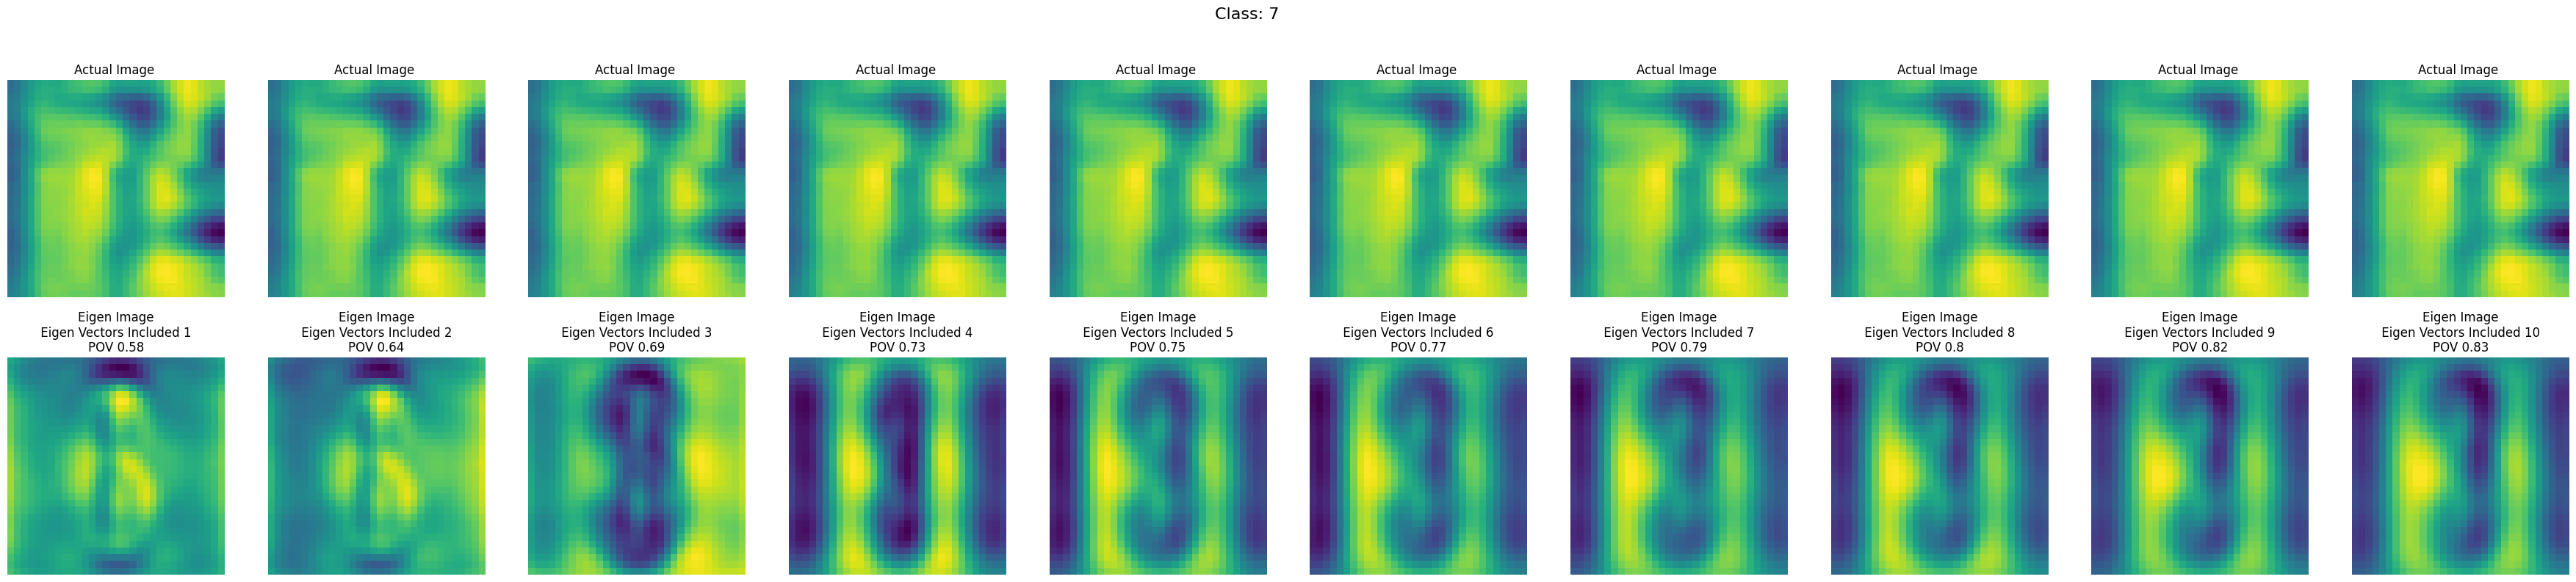

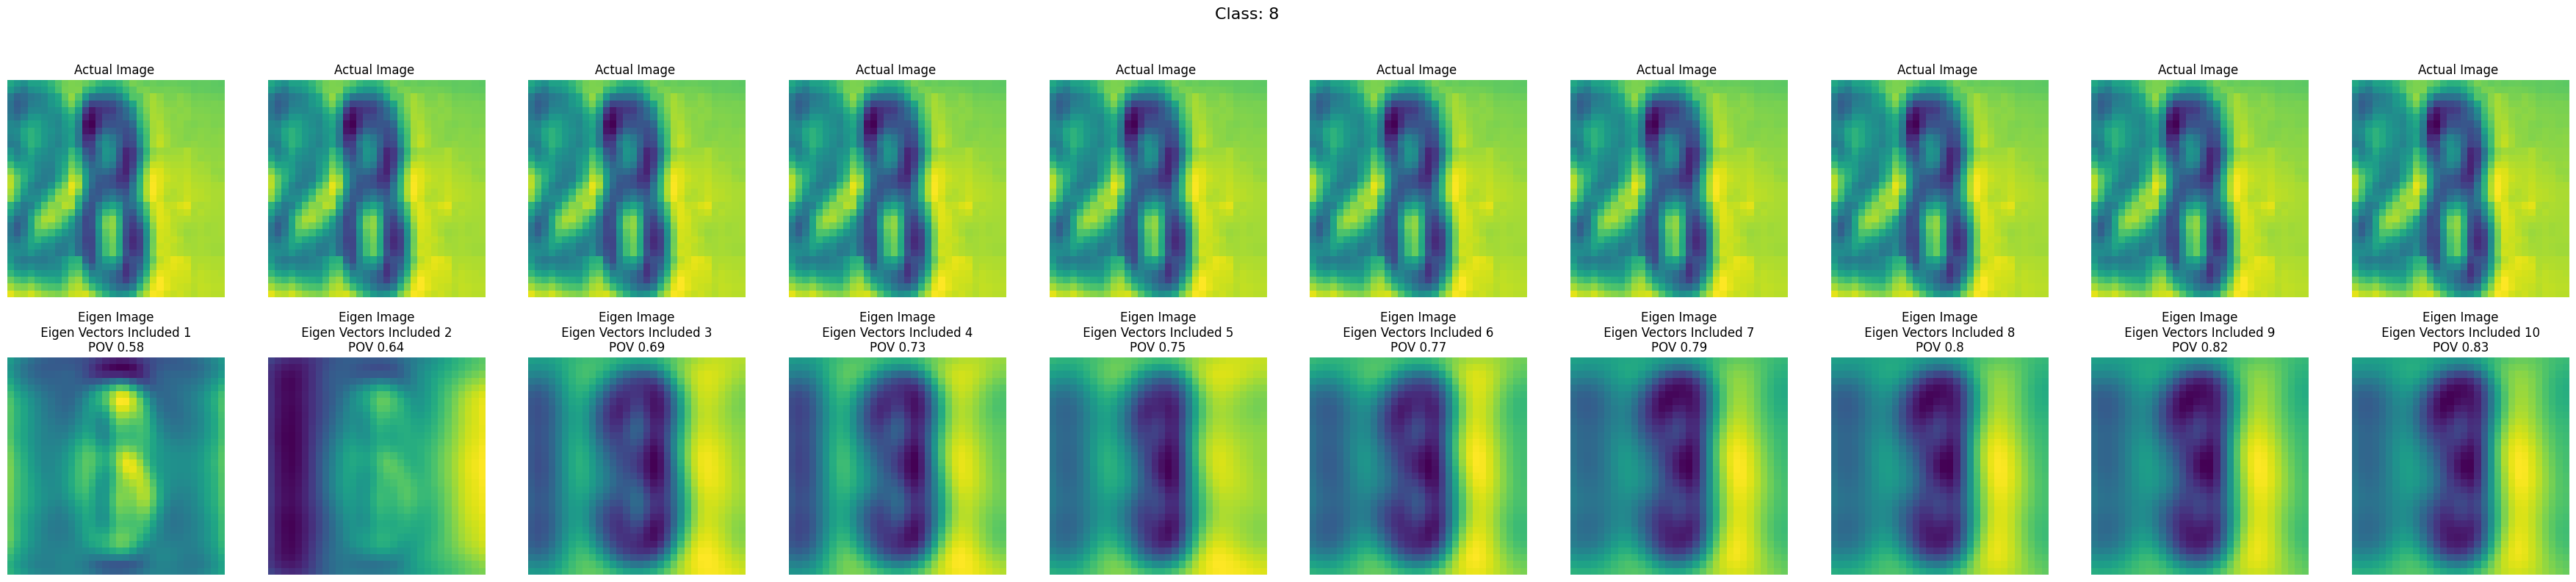

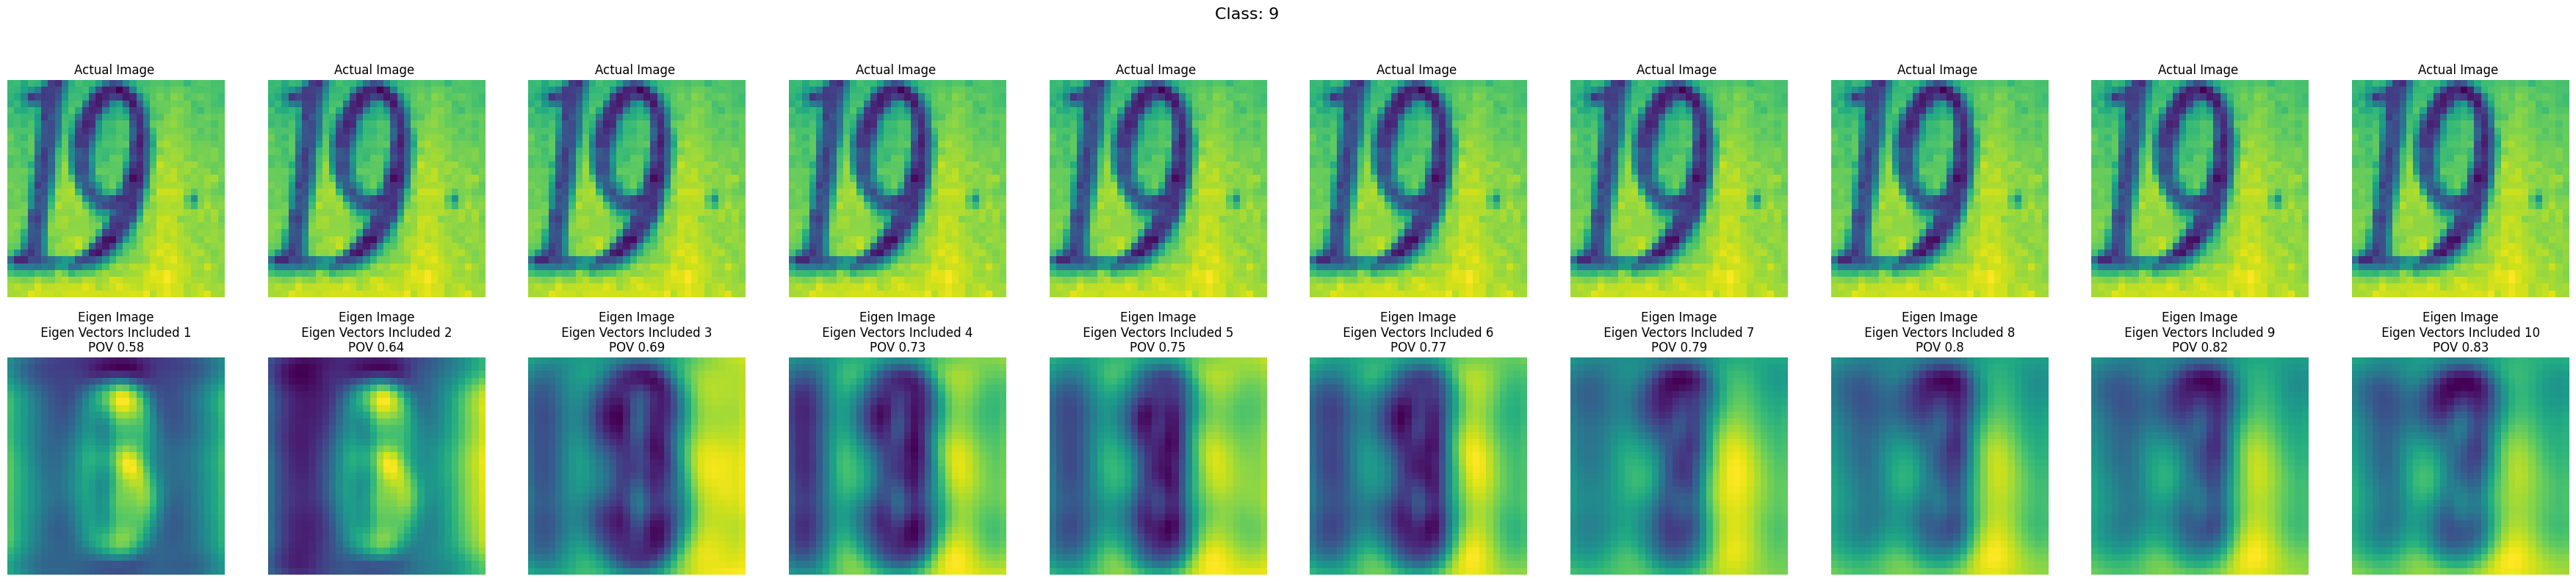

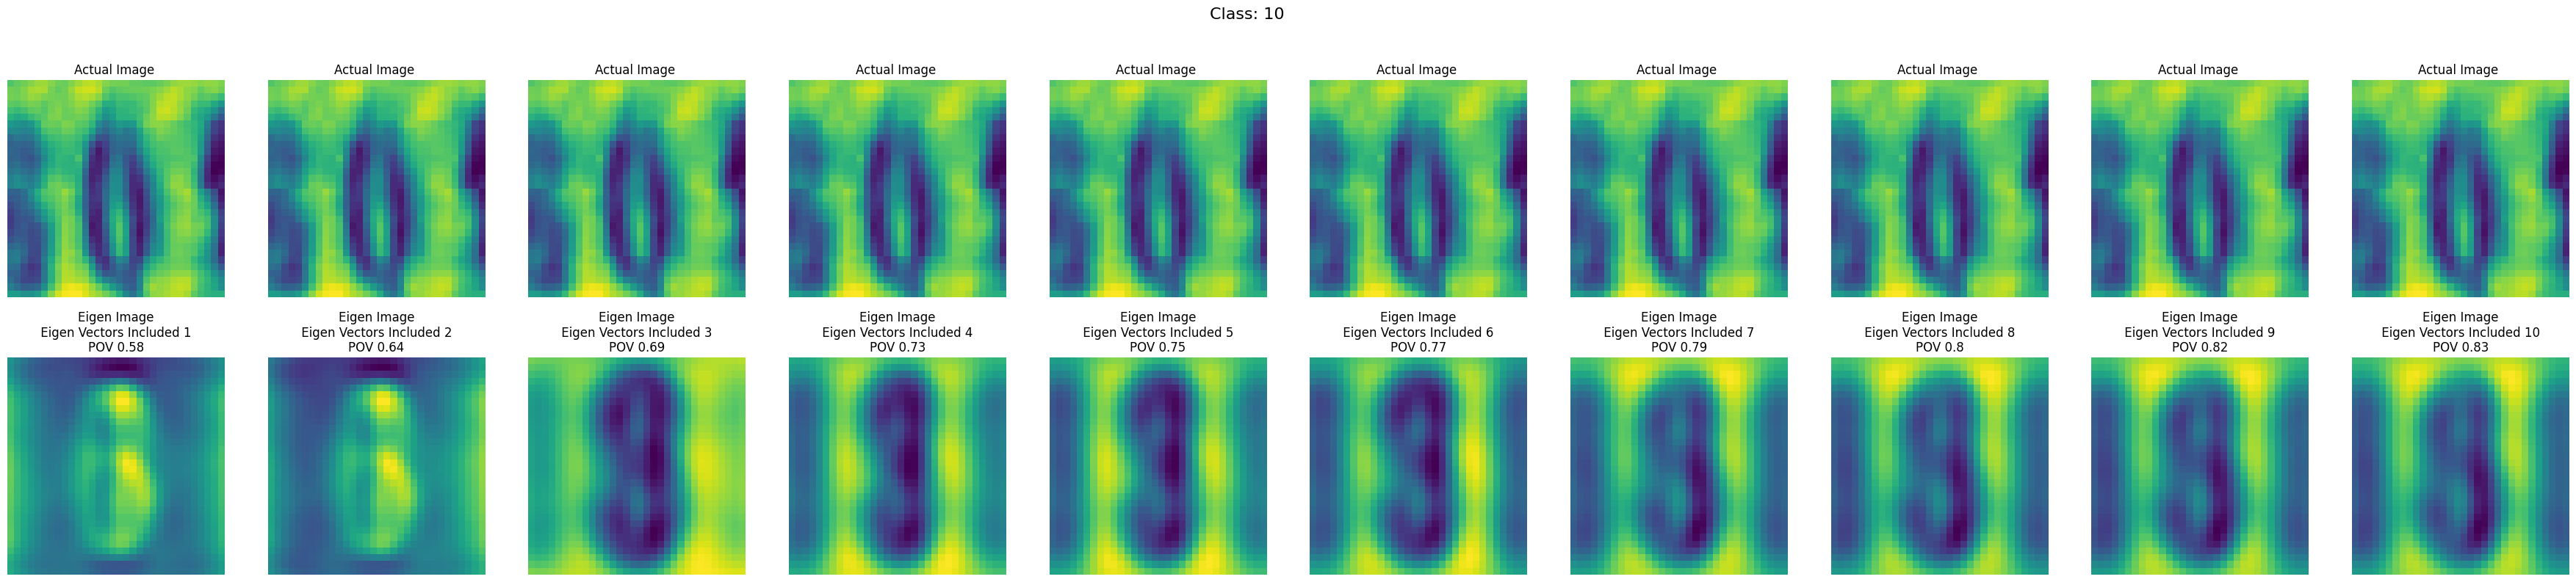

In [13]:
def plot_reconstructed_image_cumulative(X, y):
    """
    Plot original and reconstructed images in a cummulative order using top 10 eigenvectors.

    Parameters:
    - X: Input images.
    - y: Labels for images
    """
    
    n_components = 10
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    eigenvectors = pca.components_.reshape(-1, 32, 32)

    # Reconstruct 10 SVHN samples (one from each class) using cumulative top eigenvectors
    reconstructed_samples_cumulative = []
    sample_indeces = []
    reconstruct_cum = []
    reconstruct_var = []

    for class_label in range(1, 11): # Different classes 
        reconstruct_cum_i = []
        reconstruct_var_i = []

        # Find the indices of all occurrences of the class in the dataset
        class_indices = np.where(y == class_label)[0]

        # Take the first index from the class indices
        sample_indeces.append(class_indices[0])

        # Project the sample onto cumulative top eigenvectors
        reconstructed_sample_cumulative = np.zeros_like(X[class_indices[0]])
        cumulative_variance_ratio = 0
        
        for i in range(10): # For top 10 Eigen vectors in cummulative manner
            sample_pca = np.dot(X[class_indices[0]], pca.components_[i].T) # Projections
            reconstructed_sample_cumulative += sample_pca * pca.components_[i]
            reconstruct_cum_i.append(reconstructed_sample_cumulative + np.mean(X, axis=0))
            
            # Calculate Proportion of Variance (PoV)
            cumulative_variance_ratio += pca.explained_variance_ratio_[i]
            reconstruct_var_i.append(cumulative_variance_ratio)

        reconstructed_sample_cumulative += np.mean(X, axis=0)
        reconstructed_samples_cumulative.append(reconstructed_sample_cumulative)
        reconstruct_cum.append(reconstruct_cum_i)
        reconstruct_var.append(reconstruct_var_i)

    # Display original and reconstructed samples cumulatively
    for class_label in range(10):
        plt.figure(figsize=(45, 9))
        for i in range(10):
            plt.subplot(2, 10, i + 1)
            plt.imshow(X[sample_indeces[class_label]].reshape(32, 32))
            plt.title(f'Actual Image ')
            # plt.title(f"Actual image")
            plt.axis('off')

            plt.subplot(2, 10, i + 11)
            plt.title(f'Eigen Image\n Eigen Vectors Included {i+1} \nPOV {str(round(reconstruct_var[class_label][i], 2))}')
            plt.imshow(reconstruct_cum[class_label][i].reshape(32, 32))
            plt.axis('off')

        plt.suptitle(f'Class: {class_label + 1}', fontsize=16)
        #plt.title(f'{class_label + 1}, Var: {reconstruct_var[class_label][i]}')
        plt.show()

# Example usage
plot_reconstructed_image_cumulative(X_r, y)


# Observations 1(b)

We observed that
```
1. Image constructed using Top 10 eigen vectors gave indicative features of the actual image and was blurred as POV=0.83 is only explained by top 10 eigen vectors
2. Image quality improves with the increase in number of top eigen vectors gets included as variance explained by them increases

```

# Question 1(c)

Run k-NN (for k=5 and k=7) on raw data and data obtained after PCA dimensionality reduction for dimension as found in part (a) and for dimension 10 as in part (b). Provide the accuracy of the predictions on the test data set for these various cases and discuss your observations.



In [14]:
# Data preparation

svhn_data_train = loadmat('./data/train_32x32.mat')
X_train = svhn_data_train['X']
y_train = svhn_data_train['y']
print(X_train.shape)

X_train = np.reshape(X_train, (np.prod(X_train.shape[:-1]), X_train.shape[-1])).T
print(X_train.shape)
print(y_train.shape)


svhn_data_test = loadmat('./data/test_32x32.mat')
X_test = svhn_data_test['X']
y_test = svhn_data_test['y']
print(X_test.shape)

X_test = np.reshape(X_test, (np.prod(X_test.shape[:-1]), X_test.shape[-1])).T
print(X_test.shape)
print(y_test.shape)


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(32, 32, 3, 73257)
(73257, 3072)
(73257, 1)
(32, 32, 3, 26032)
(26032, 3072)
(26032, 1)


In [15]:
# k-NN on raw data
k_values = [5, 7]
for k in k_values:
    knn_raw = KNeighborsClassifier(n_neighbors=k)
    knn_raw.fit(X_train, y_train.ravel())
    
    # y_pred_train_raw = knn_raw.predict(X_train)
    # acc_train_raw = accuracy_score(y_test.ravel(), y_pred_raw)
    
    y_pred_raw = knn_raw.predict(X_test)
    acc_test_raw = accuracy_score(y_test.ravel(), y_pred_raw)
    
    print(f"k-NN on raw data with k={k}:")
    # print(f"Train Accuracy = {acc_train_raw:4f}")
    print(f"Test Accuracy = {acc_test_raw*100:.4f}")
    print("*"*50)


k-NN on raw data with k=5:
Test Accuracy = 46.8308
**************************************************
k-NN on raw data with k=7:
Test Accuracy = 47.5146
**************************************************


In [16]:

# PCA dimensionality reduction for dim 26
num_components = 26
pca_26 = PCA(n_components=num_components)
X_train_pca_26 = pca_26.fit_transform(X_train)
X_test_pca_26 = pca_26.transform(X_test)

# k-NN on PCA-reduced data for dim 26
for k in k_values:
    knn_pca_26 = KNeighborsClassifier(n_neighbors=k)
    knn_pca_26.fit(X_train_pca_26, y_train.ravel())

    # y_pred_pca_26 = knn_pca_26.predict(X_train)
    # acc_train_pca_26 = accuracy_score(y_test.ravel(), y_pred_pca_26)
    
    y_pred_pca_26 = knn_pca_26.predict(X_test_pca_26)
    acc_test_pca_26 = accuracy_score(y_test.ravel(), y_pred_pca_26)
    
    print(f"k-NN on PCA-reduced data (dim 26) with k={k}:")
    # print(f"Train Accuracy = {acc_train_pca_26:4f}")
    print(f"Test Accuracy = {acc_test_pca_26*100:.4f}")
    print("*"*50)



k-NN on PCA-reduced data (dim 26) with k=5:
Test Accuracy = 46.1240
**************************************************
k-NN on PCA-reduced data (dim 26) with k=7:
Test Accuracy = 46.8731
**************************************************


In [17]:

# PCA dimensionality reduction for dim 10
num_components = 10
pca_10 = PCA(n_components=num_components)
X_train_pca_10 = pca_10.fit_transform(X_train)
X_test_pca_10 = pca_10.transform(X_test)

# k-NN on PCA-reduced data for dim 10
for k in k_values:
    knn_pca_10 = KNeighborsClassifier(n_neighbors=k)
    knn_pca_10.fit(X_train_pca_10, y_train.ravel())

    # y_pred_pca_10 = knn_pca_26.predict(X_train)
    # acc_train_pca_10 = accuracy_score(y_test.ravel(), y_pred_pca_10)
    
    y_pred_pca_10 = knn_pca_10.predict(X_test_pca_10)
    acc_test_pca_10 = accuracy_score(y_test.ravel(), y_pred_pca_10)
    
    print(f"k-NN on PCA-reduced data (dim 10) with k={k}:")
    # print(f"Train Accuracy = {acc_train_pca_10:4f}")
    print(f"Test Accuracy = {acc_test_pca_10*100:.4f}")
    print("*"*50)



k-NN on PCA-reduced data (dim 10) with k=5:
Test Accuracy = 29.9362
**************************************************
k-NN on PCA-reduced data (dim 10) with k=7:
Test Accuracy = 30.8505
**************************************************


# Observations 1(c)

Following are the test accuracy observed for various scenarios 

### 1. Raw Data 

With no dimensionality reduction

| K | Test Accuracy |
|----------|----------|
| 5 | 46.83 |
| 7 | 47.51 |

### 2. Data 26dim

With PCA reduced data to 26 dimension

| K | Test Accuracy |
|----------|----------|
| 5 | 46.07 |
| 7 | 46.85 |


### 3. Data 10 dim 

With PCA reduced data to 10 dimension

| K | Test Accuracy |
|----------|----------|
| 5 | 29.93 |
| 7 | 30.85 |


From the above results we observe that 
```
1. Test Accuracy drops only minutely when dimension is reduced to 26 as POV explained by it exceeds 0.90
2. Test Accuracy drops significantly as POV explained by it is nearly 0.80

```